In [1]:
from __future__ import print_function
import numpy as np
import scipy as sp

In [2]:
>>> def pend(y, t):
...     global b, c
...     theta, omega = y
...     dydt = [omega, -b*omega - c*np.sin(theta)]
...     return dydt

In [3]:
>>> b = np.asarray((0.25))
>>> c = np.asarray((5.0))
>>> y0 = [np.pi - 0.1, 0.0]
>>> t = np.linspace(0, 10, 1000)
>>> from scipy.integrate import odeint
>>> sol = odeint(pend, y0, t)#, args=(b, c))
theta, omega = sol[:,0], sol[:,1]

In [4]:
>>> import matplotlib.pyplot as plt
>>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
>>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
>>> plt.legend(loc='best')
>>> plt.xlabel('t')
>>> plt.grid()
plt.gcf().set_size_inches(10,4)
>>> plt.show()

In [5]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)


In [18]:
import os
from os.path import join, expanduser
a = np.array([1, 2, 3, 4])
b = np.array([1.1, 2.1, 3.1, 4.1])
np.allclose(a, b, rtol=0, atol=0.15)

True

In [20]:
save_dir = join(expanduser('~'), 'catkin_ws', 'src', 'youbot', 'youbot_navigation', 'data')
os.listdir(save_dir)

OSError: [Errno 2] No such file or directory: '/home/lex/catkin_ws/src/youbot/navigation/data'

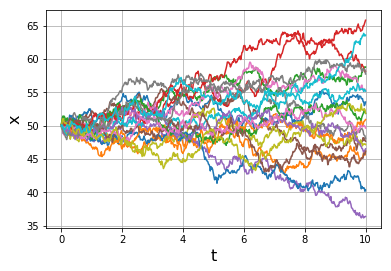

In [7]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [59]:
import os
from os.path import join, expanduser

save_dir = join(expanduser('~'), 'catkin_ws', 'src', 'youbot', 'youbot_navigation', 'data')
# print(save_dir)

os.chdir(save_dir)

from io import StringIO   # StringIO behaves like a file object
c = StringIO("trajectory.txt")
tr = np.loadtxt(c)
print(tr)

traj = np.loadtxt(save_dir + '/trajectory.txt')
with open(join(save_dir, 'time.txt'), 'r') as f:
    fin_time = f.readline()

# os.listdir('/home/lex/catkin_ws/src/youbot/youbot_navigation/data/trajectory.txt')
                 

TypeError: initial_value must be unicode or None, not str

In [46]:
 
traj = np.array([[5.106413033249904967e-05 1.296597590449697680e-04 5.491819371946292238e-06]
                [7.539972601127212497e-05 1.230494048374941964e-04 2.514791265173007005e-05]
                [2.393076384313026338e-03 8.726562694851203910e-05 1.223906466125152393e-04]
                [2.346674074419953255e-03 -3.456700617849190480e-04 1.246118204639300078e-04]
                [-7.570577879946777545e-04 -2.860650661551905442e-03 5.289556055555776938e-05]
                [-3.111119119517241887e-03 -4.132850901384910701e-03 9.431653145453441575e-05]
                [-1.243934493271369422e-03 -1.400460404217172827e-03 -4.358103185322796983e-05]
                [2.446933151690300345e-02 2.525300573779807808e-02 1.810014177194021372e-03]
                [8.138096548617015924e-02 8.604491518372922587e-02 8.730132321289775857e-03]
                [1.502231838475261982e-01 1.643706425494851353e-01 1.831793184296841639e-02]
                [1.972399666446784106e-01 2.220080423341990461e-01 2.459855340514548530e-02]
                [2.112253968167276119e-01 2.403947697934731842e-01 2.451823678528868358e-02]
                [2.108944006934430904e-01 2.396860723108540092e-01 2.301509830731890763e-02]
                [2.084001047303991605e-01 2.338711910963950646e-01 2.058745483419987393e-02]
                [2.080076394557171249e-01 2.302229834886439230e-01 1.823661827631193472e-02]
                [2.104590177081178959e-01 2.304713686703568076e-01 1.561099984902499828e-02]
                [2.155567913667019997e-01 2.350988046142598320e-01 1.338561687355488937e-02]
                [2.150476517693519218e-01 2.355254494525749198e-01 1.056083124296829101e-02]
                [2.045650784374862252e-01 2.290050393072490809e-01 7.003368772628182186e-03]
                [2.045598383425221156e-01 2.304171206968345098e-01 3.647548811470480244e-03]
                [2.439732281115917778e-01 2.774040278397333914e-01 8.479629051190448394e-03]
                [3.145797989949830620e-01 3.687988166560293712e-01 2.049065538847660850e-02]
                [3.720901276392084567e-01 4.588559508527745856e-01 3.174730183548005180e-02]
                [3.934646134550983665e-01 5.018518122035932061e-01 3.540131387701703214e-02]
                [3.925580078681301099e-01 5.017834420393901818e-01 3.368008365708326929e-02]
                [3.878660921412244722e-01 4.911335068736402132e-01 3.043842292637572930e-02]
                [3.918513882973503337e-01 4.971560332770243451e-01 2.820610947734556589e-02]
                [4.042812667217942080e-01 5.191112461298335035e-01 2.841514346142830563e-02]
                [4.114530318807996245e-01 5.313347641889670792e-01 2.713090293971567521e-02]
                [4.116796100411602155e-01 5.314214034374321605e-01 2.532189964252665182e-02]
                [4.108198013945331684e-01 5.245884132805214151e-01 2.259843227537248686e-02]
                [4.099689680908212841e-01 5.177748989480369657e-01 1.974885385350905187e-02]
                [4.094175718972130618e-01 5.131110031671695104e-01 1.748863703682929441e-02]
                [4.092745572267652010e-01 5.111440735588533846e-01 1.533004369958972622e-02]
                [4.095095874183729001e-01 5.112240651062074370e-01 1.348713910341602790e-02]
                [4.107044463160293146e-01 5.116718496879671951e-01 1.048466766357997182e-02]
                [4.144226061626395952e-01 5.133213040984869746e-01 7.934930817657934177e-03]
                [4.185235563623085908e-01 5.158572142726287613e-01 5.328099094160093988e-03]
                [4.215714166677856367e-01 5.178483045856588918e-01 2.674931347588548405e-03]
                [4.224717347414125301e-01 5.186529175674593484e-01 1.444034676623777154e-04]
                [4.224773053442626991e-01 5.186570088593072114e-01 2.566509227027861480e-06]
                [4.224914500449958865e-01 5.186567659084215798e-01 -9.049589255331236704e-06]
                [4.794666488491053924e-01 5.742825499232869779e-01 6.956817376174245088e-03]
                [5.251515071484637032e-01 6.206224528806997265e-01 1.183244488272706951e-02]
                [5.708374872846865289e-01 6.669731310642139643e-01 1.665186939826104537e-02]
                ])

SyntaxError: invalid syntax (<ipython-input-46-19af8332d699>, line 2)

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1, figsize=(8, 5))
ax.plot

In [12]:
import numpy as np
V = np.zeros((10, 4))
for i in range(10):
    V[i] = [i, i+1, i+2,i+3]
print(V)

for i in range(10):
    V[i] = [i, i+1, i+2,i+3]
# print(V)

goal_state = np.asarray([0.82452343,  0.59753333,  0.07282408]).T
cur_state = np.asarray([0.82452343,  0.59753333,  0.07282408]).T

gs = np.linalg.norm(goal_state)
cs = np.linalg.norm(cur_state+0.5)
print(gs, cs)
np.allclose(cur_state+0.1, goal_state, atol=1e-5, rtol=0)

[[ 0.  1.  2.  3.]
 [ 1.  2.  3.  4.]
 [ 2.  3.  4.  5.]
 [ 3.  4.  5.  6.]
 [ 4.  5.  6.  7.]
 [ 5.  6.  7.  8.]
 [ 6.  7.  8.  9.]
 [ 7.  8.  9. 10.]
 [ 8.  9. 10. 11.]
 [ 9. 10. 11. 12.]]
(1.020876247988805, 1.8130276207790383)


False

In [9]:
state = np.zeros((100, 3, 1))
a = np.array([[1,1,1]])
for i in range(100):
    state[i,:,:].fill(i)
#     if i < 5:
#         print('state at ', i, '\n', state[i])

print('\nstate up to 4: ', '\n', state[99:,:,:])
cost = np.sum(a*(state[91,:,:] ** 2) , axis=0)
print('cost \n', cost, cost.shape)

# print(state[:4, :,:] ** 2)
# cost_sum = 0
# for i in range(4):
#     cost_sum += (state[i,:,:].T.dot(state[i,:,:]))
# print('cost_sum: ', cost_sum)


state up to 4:  
 [[[ 99.]
  [ 99.]
  [ 99.]]]
cost 
 [ 24843.  24843.  24843.] (3,)


In [18]:
# simulate covariance vector of change in control law at every time step
Qu = np.empty(4)

# res = Qu.T.dot(Qu)
res = np.expand_dims(Qu, 1).T.dot(np.expand_dims(Qu, 1))#.dot(Qu)
res

array([[ 4.]])

In [30]:
os.remove('/tmp/test.txt')
# for i in range(5):
#     f = open('/tmp/test.txt', 'a')
#     np.savetxt(f, np.arange(5).reshape(5, 1), delimiter='\n')
#     f.close()
with open('/tmp/test.txt', 'a') as f:
    for i in range(5):
        np.savetxt(f, np.arange(10).reshape(5, 2))
    
test = np.loadtxt('/tmp/test.txt')
print(test.shape)


(25, 2)
